# <span style="color:darkblue"> QTM 151 - Quiz 4 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here
print("Meredith Teague")




Meredith Teague


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your answer here:
print("I will abide by Emory's code of conduct")


I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [3]:
# Write your answer here
import pandas as pd
import matplotlib.pyplot as plt 




<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for the following currencies:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "currencies.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 16.


In [48]:
# Write your own code
data = pd.read_csv("data_raw/currencies.csv")
data["date_string"] = pd.to_datetime(data["date_string"], format = "%A, %b %d, %Y")
data["date_string"]


0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
          ...    
6320   2023-03-27
6321   2023-03-28
6322   2023-03-29
6323   2023-03-30
6324   2023-03-31
Name: date_string, Length: 6325, dtype: datetime64[ns]

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 18 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


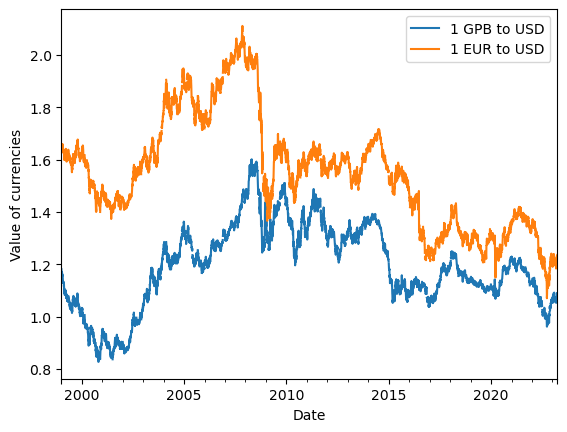

In [49]:
# Write your own code
data[["date_string","gbp_to_usd","eur_to_usd"]].set_index("date_string").plot()
plt.xlabel("Date")
plt.ylabel("Value of currencies")
plt.legend(["1 GPB to USD","1 EUR to USD"])
plt.show()



<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)```

In [50]:
# Write your own code
data["diff_euro"] = data["eur_to_usd"].diff()
data["lag_euro"]    = data["eur_to_usd"].shift(1)

data["growth_euro"] = (data["diff_euro"]/data["lag_euro"])* 100
data




,date_string,eur_to_usd,gbp_to_usd,diff_euro,lag_euro,growth_euro
0,1999-01-04,1.6581,1.1812,NaN,NaN,NaN
1,1999-01-05,1.6566,1.1760,-0.0015,1.6581,-0.090465
2,1999-01-06,1.6547,1.1636,-0.0019,1.6566,-0.114693
3,1999-01-07,1.6495,1.1672,-0.0052,1.6547,-0.314256
4,1999-01-08,1.6405,1.1554,-0.0090,1.6495,-0.545620
...,...,...,...,...,...,...
6320,2023-03-27,1.2278,1.0789,0.0053,1.2225,0.433538
6321,2023-03-28,1.2341,1.0844,0.0063,1.2278,0.513113
6322,2023-03-29,1.2313,1.0826,-0.0028,1.2341,-0.226886
6323,2023-03-30,1.2368,1.0899,0.0055,1.2313,0.446682


<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 18 to create a shaded region <br>
for time periods where "bool_cond" is true.



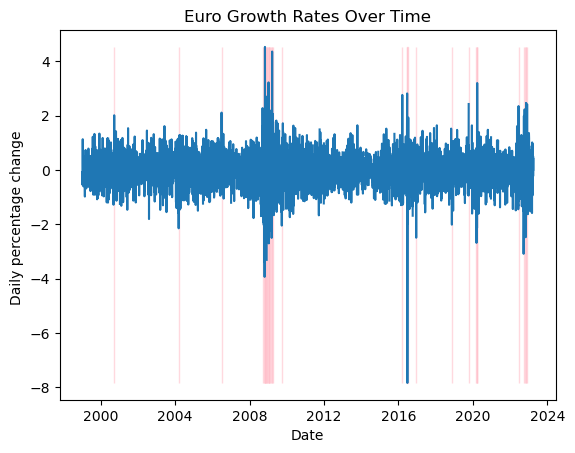

In [53]:
# Write your own code
import numpy as np
data["absval"] = np.abs(data["growth_euro"])
data["bool_cond"] = data["absval"] > 2 

plt.plot("date_string", "growth_euro", data = data)
plt.xlabel("Date")
plt.ylabel("Daily percentage change ")
plt.title("Euro Growth Rates Over Time")

vec_y = data["growth_euro"]
plt.fill_between(x= data["date_string"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = data["bool_cond"],
                 alpha = 0.6,color = "pink")

plt.show()





<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 16 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




In [54]:
# Write your own code
month_config = pd.Grouper(key='date_string', freq='m')
newData = data.groupby(month_config).agg(euro_standDev = ("eur_to_usd","std")).reset_index()
newData




/var/folders/bl/pcmmjc1s7gvdfjkchfwlcdnr0000gn/T/ipykernel_24338/402502736.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_config = pd.Grouper(key='date_string', freq='m')


,date_string,euro_standDev
0,1999-01-31,0.007345
1,1999-02-28,0.013345
2,1999-03-31,0.010475
3,1999-04-30,0.006172
4,1999-05-31,0.013046
...,...,...
286,2022-11-30,0.027308
287,2022-12-31,0.011389
288,2023-01-31,0.015046
289,2023-02-28,0.008972


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["eur_to_usd","gbp_to_usd"]
```

- Display the dataset

Hint: See Lecture 18 for details on ```pd.melt()```

In [55]:

data_long = pd.melt(data,
                         var_name = "type",
                         value_name = "exchange_rate",

                         id_vars='date_string',
                         value_vars=['eur_to_usd','gbp_to_usd'])
data_long


,date_string,type,exchange_rate
0,1999-01-04,eur_to_usd,1.6581
1,1999-01-05,eur_to_usd,1.6566
2,1999-01-06,eur_to_usd,1.6547
3,1999-01-07,eur_to_usd,1.6495
4,1999-01-08,eur_to_usd,1.6405
...,...,...,...
12645,2023-03-27,gbp_to_usd,1.0789
12646,2023-03-28,gbp_to_usd,1.0844
12647,2023-03-29,gbp_to_usd,1.0826
12648,2023-03-30,gbp_to_usd,1.0899
